# How Many Washingtonians are Low- or Middle- Income?

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import geopandas as gpd

## State-level data

Data Source: 2018 American Community Survey via IPUMS NHGIS, University of Minnesota, www.nhgis.org

In [2]:
states = pd.read_csv('../data/2018_state.csv')

In [3]:
wa = states.loc[states['STATE'] == 'Washington']

In [4]:
wa

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTYA,COUSUBA,PLACEA,TRACTA,...,AJY9M017,AJZAM001,AJ0EM001,AJ1CM001,AJ1CM002,AJ1CM003,AJ1CM004,AJ1CM005,AJ1CM006,AJ1CM007
48,G530,2014-2018,NaN,NaN,Washington,53,NaN,NaN,NaN,NaN,...,2752,308,168,1574,6117,5945,6919,3629,1425,6190


### ratio of income to poverty level - population for whom poverty status is determined

In [5]:
income_to_pov = wa.loc[:, 'AJY4E001': 'AJY4E008']
income_to_pov

,AJY4E001,AJY4E002,AJY4E003,AJY4E004,AJY4E005,AJY4E006,AJY4E007,AJY4E008
48,7161708,377106,444515,255057,273495,395859,177498,5238178


In [6]:
income_to_pov.columns = ['Total', 
        'Under .50',
        '.50 to .99',
        '1.00 to 1.24',
        '1.25 to 1.49',
        '1.50 to 1.84',
        '1.85 to 1.99',
        '2.00 and over']
income_to_pov.columns = income_to_pov.columns.str.replace(' ', '_').str.lower()

In [7]:
income_to_pov = income_to_pov.astype(int)

In [8]:
income_to_pov

,total,under_.50,.50_to_.99,1.00_to_1.24,1.25_to_1.49,1.50_to_1.84,1.85_to_1.99,2.00_and_over
48,7161708,377106,444515,255057,273495,395859,177498,5238178


In [9]:
less_than_2x_poverty = sum(income_to_pov.loc[48, 'under_.50':'1.85_to_1.99'])

In [10]:
less_than_2x_poverty

1923530

In [11]:
less_than_2x_poverty / income_to_pov['total']

48    0.268585
Name: total, dtype: float64

### household income

In [12]:
house_income = wa.loc[:,'AJY9E001':'AJY9E017'].astype(int)

In [13]:
income_column_names = ['Total',
        'Less than $10,000',
        '$10,000 to $14,999',
        '$15,000 to $19,999',
        '$20,000 to $24,999',
        '$25,000 to $29,999',
        '$30,000 to $34,999',
        '$35,000 to $39,999',
        '$40,000 to $44,999',
        '$45,000 to $49,999',
        '$50,000 to $59,999',
        '$60,000 to $74,999',
        '$75,000 to $99,999',
        '$100,000 to $124,999',
        '$125,000 to $149,999',
        '$150,000 to $199,999',
        '$200,000 or more']

In [14]:
house_income.columns = income_column_names
house_income.columns = house_income.columns.str.replace(' ', '_').str.replace('$', '').str.lower()

In [15]:
house_income

,total,"less_than_10,000","10,000_to_14,999","15,000_to_19,999","20,000_to_24,999","25,000_to_29,999","30,000_to_34,999","35,000_to_39,999","40,000_to_44,999","45,000_to_49,999","50,000_to_59,999","60,000_to_74,999","75,000_to_99,999","100,000_to_124,999","125,000_to_149,999","150,000_to_199,999","200,000_or_more"
48,2800423,144695,95789,99129,104429,107027,112120,110303,115143,105170,210273,286122,381845,281885,196331,215941,234221


In [16]:
people_per_house = income_to_pov.loc[48, 'total']/house_income.loc[48, 'total']
print(f"Average people per household: {income_to_pov.loc[48, 'total']/house_income.loc[48, 'total']}")

Average people per household: 2.5573665121304887


In [17]:
median_house_income = wa.loc[:, 'AJZAE001'].astype(int)
median_house_income = median_house_income[48]
median_house_income

70116

In [18]:
print(f"""HUD income levels:
low (80% median): {median_house_income*.8}
very low (50% median): {median_house_income*.5}
extremely low(30% median): {median_house_income*.3}""")

HUD income levels:
low (80% median): 56092.8
very low (50% median): 35058.0
extremely low(30% median): 21034.8


In [19]:
low_income = (sum(house_income.loc[48, 'less_than_10,000': '45,000_to_49,999']), 
              sum(house_income.loc[48, 'less_than_10,000': '50,000_to_59,999']))

In [20]:
print(f"""Households @ HUD income levels:
low: {low_income[0]} - {low_income[1]}
very low: {sum(house_income.loc[48, 'less_than_10,000': '30,000_to_34,999'])}
extremely low: {sum(house_income.loc[48, 'less_than_10,000': '15,000_to_19,999'])}""")

Households @ HUD income levels:
low: 993805 - 1204078
very low: 663189
extremely low: 339613


In [21]:
print(f"proportion of households that are low income: {low_income[0]/house_income.loc[48, 'total']} - {low_income[1]/house_income.loc[48, 'total']}")

proportion of households that are low income: 0.35487674540596187 - 0.4299629020330143


In [22]:
print(f"people in low income households based on avg household size: {low_income[0]*2.6} - {low_income[1]*2.6}")

people in low income households based on avg household size: 2583893.0 - 3130602.8000000003


## Low-moderate Income Households 

80% of Washington State Median household income

In [23]:
# extracting start and end values from column names
income_cols = []
for i, col in enumerate(house_income.columns):
    splits = col.replace(',', '').split('_')
    income_range = [np.nan, np.nan]
    if splits[0].isnumeric():
        income_range[0] = int(splits[0])
    if len(splits)>1 and splits[2].isnumeric():
        income_range[1] = int(splits[2])
    income_cols.append(income_range)

In [24]:
def get_col(n, cols):
    """returns the index and range of the column where n falls within the column range
    params:
      n: value
      cols: list of lists [[col0_min, col0_max], [col1_min, col1_max], [col2_min, col2_max], ...]
    returns:
      (index, range_min, range_max)"""
    for i, col in enumerate(cols):
        if (i == 0) or (n > col[1] and not np.isnan(col[1])):
            continue
        return i

def cal_partial_col(threshold, col_min, col_max, n_hh):
    """returns the number of households proportionate to the location of the threshold within the range of incomes
    """
    return (threshold - col_min) / (col_max - col_min) * n_hh

def est_households(est_hh, threshold, income_cols, house_income):
    """Estimates the number of households with incomes below the threshold
    
    params:
      est_hh: data frame with column [threshold name]_threshold """
    est_hh['column_i'] = est_hh[threshold +'_threshold'].apply(lambda x: get_col(x, income_cols))
    est_hh['col_min'] = [income_cols[i][0] for i in est_hh['column_i']]
    est_hh['col_max'] = [income_cols[i][1] for i in est_hh['column_i']]
    est_hh['sum_below'] = [sum(house_income.iloc[index, 1:column]) 
                               for index, column in enumerate(est_hh['column_i'])]
    est_hh['partial_ratio'] = ((est_hh[threshold +'_threshold'] - est_hh['col_min']) /
                             (est_hh['col_max'] - est_hh['col_min']))
    est_hh['n_hh_in_band'] = [house_income.iloc[index, column] for index, column in enumerate(est_hh['column_i'])]
    est_hh['total_hh_' + threshold] = est_hh['sum_below'] + est_hh['n_hh_in_band']*est_hh['partial_ratio']
    return est_hh.drop(columns=['column_i', 'col_min', 'col_max', 'sum_below', 'partial_ratio', 'n_hh_in_band'])

In [25]:
income_80 = .8 * median_house_income
income_75 = .75 * median_house_income
income_70 = .70 * median_house_income
income_65 = .65 * median_house_income
income_60 = .60 * median_house_income
income_55 = .55 * median_house_income
income_50 = .50 * median_house_income

In [26]:
wa_households = wa.loc[:, 'STATE':'STATEA'].copy()

In [27]:
wa_households['80_threshold'] = income_80
wa_households['75_threshold'] = income_75
wa_households['70_threshold'] = income_70
wa_households['65_threshold'] = income_65
wa_households['60_threshold'] = income_60
wa_households['55_threshold'] = income_55
wa_households['50_threshold'] = income_50
wa_households['avg_household_count'] = people_per_house

In [28]:
wa_households = est_households(wa_households, '80', income_cols, house_income)
wa_households = est_households(wa_households, '75', income_cols, house_income)
wa_households = est_households(wa_households, '70', income_cols, house_income)
wa_households = est_households(wa_households, '65', income_cols, house_income)
wa_households = est_households(wa_households, '60', income_cols, house_income)
wa_households = est_households(wa_households, '55', income_cols, house_income)
wa_households = est_households(wa_households, '50', income_cols, house_income)


# wa_people = wa_households * wa_households['avg_household_count'], 0)

In [29]:
wa_households.T

,48
STATE,Washington
STATEA,53
80_threshold,56092.8
75_threshold,52587
70_threshold,49081.2
65_threshold,45575.4
60_threshold,42069.6
55_threshold,38563.8
50_threshold,35058
avg_household_count,2.55737


In [30]:
wa_people = wa_households.loc[:, 'total_hh_80':'total_hh_50'] * wa_households.loc[48, 'avg_household_count']
wa_people.columns = [col.replace('_hh_', '') for col in wa_people.columns]

In [31]:
wa_people

,total80,total75,total70,total65,total60,total55,total50
48,2.869194e+06,2.680652e+06,2.492144e+06,2.303523e+06,2.100011e+06,1.897117e+06,1.699290e+06


In [32]:
print(f"% of washingtonias in households that earn less than 80% of state median income: {wa_people.loc[48, 'total80']/income_to_pov.loc[48, 'total']}")

% of washingtonias in households that earn less than 80% of state median income: 0.400629814222574


### Visualizing WA State Incomes

In [33]:
house_income.values[0]

array([2800423,  144695,   95789,   99129,  104429,  107027,  112120,
        110303,  115143,  105170,  210273,  286122,  381845,  281885,
        196331,  215941,  234221])

Text(0.5, 0, 'Household Income Range')

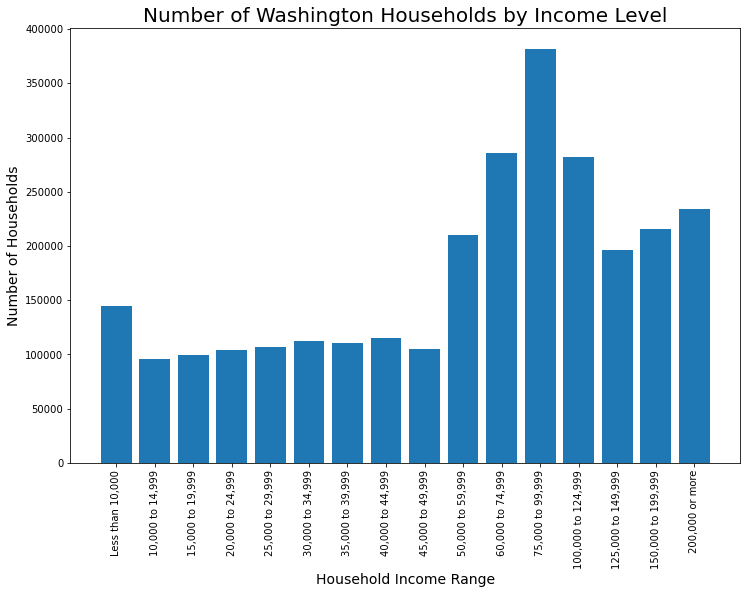

In [34]:
# this visualization distorts perception due to the variable size of the buckets

fig, ax = plt.subplots(figsize=(12,8))
x_labels = [x.replace('$', '') for x in income_column_names[1:]]
plt.bar(x_labels, house_income.values[0][1:])
plt.xticks(rotation='vertical')
plt.title('Number of Washington Households by Income Level', fontsize=20)
plt.ylabel('Number of Households', fontsize=14)
plt.xlabel('Household Income Range', fontsize=14)


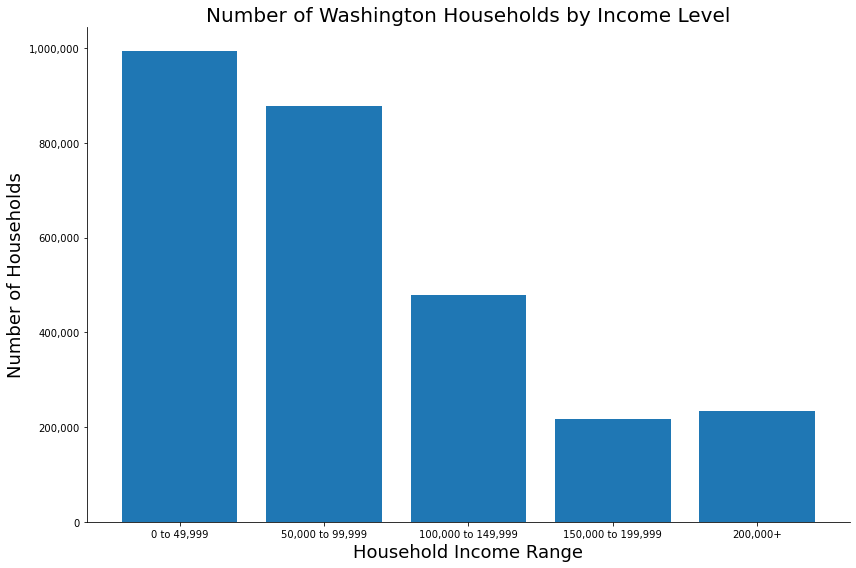

In [35]:
# this plot makes the bucket size the same (with the exception of 200k+)
x_labels = ['0 to 49,999', '50,000 to 99,999', '100,000 to 149,999', '150,000 to 199,999', '200,000+']
values = house_income.values[0][1:]
y_values = [sum(values[0:9]), sum(values[9:12]), sum(values[12:14]), values[14], values[15]]

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(x_labels, y_values)

# add commas to y-axis labels
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Number of Washington Households by Income Level', fontsize=20)
plt.ylabel('Number of Households', fontsize=18)
plt.xlabel('Household Income Range', fontsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()
plt.savefig('./images/hh_income0_200k.png')

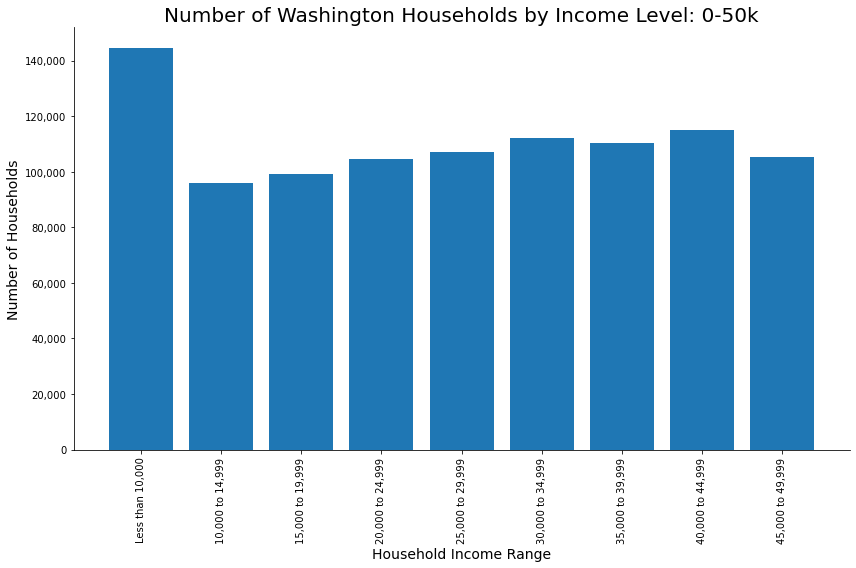

In [36]:
# show distribution of household incomes 10 to 50k
fig, ax = plt.subplots(figsize=(12,8))
x_labels = [x.replace('$', '') for x in income_column_names[1:10]]
plt.bar(x_labels, house_income.values[0][1:10])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add and format labels
plt.title('Number of Washington Households by Income Level: 0-50k', fontsize=20)
plt.ylabel('Number of Households', fontsize=14)
plt.xlabel('Household Income Range', fontsize=14)
plt.xticks(rotation='vertical')

# add commas to y-axis labels
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.savefig('./images/hh_income0_50k.png')

## County Level Data

In [37]:
counties = pd.read_csv('../data/2018_county.csv', encoding='latin-1')

In [38]:
wa_counties = counties[counties['STATE'] == 'Washington']

In [39]:
# check for correct county count
wa_counties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2954 to 2992
Columns: 108 entries, GISJOIN to AJ1CM007
dtypes: object(108)
memory usage: 33.2+ KB


In [40]:
wa_counties.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,AJY9M017,AJZAM001,AJ0EM001,AJ1CM001,AJ1CM002,AJ1CM003,AJ1CM004,AJ1CM005,AJ1CM006,AJ1CM007
2954,G5300010,2014-2018,NaN,NaN,Washington,53,Adams County,001,NaN,NaN,...,60,5961,1088,90,298,298,317,181,19,279
2955,G5300030,2014-2018,NaN,NaN,Washington,53,Asotin County,003,NaN,NaN,...,85,2558,1546,97,366,366,410,211,22,370
2956,G5300050,2014-2018,NaN,NaN,Washington,53,Benton County,005,NaN,NaN,...,358,2031,666,290,1074,1060,1091,521,111,1068
2957,G5300070,2014-2018,NaN,NaN,Washington,53,Chelan County,007,NaN,NaN,...,217,2615,1085,202,807,810,814,357,37,826
2958,G5300090,2014-2018,NaN,NaN,Washington,53,Clallam County,009,NaN,NaN,...,192,1998,952,191,758,746,799,274,82,791


In [41]:
c_populations = wa_counties.loc[:,['COUNTY','AJWME001']]
c_populations.columns = ['county', 'population']
c_populations['population'] = c_populations['population'].astype(int)
c_populations

,county,population
2954,Adams County,19452
2955,Asotin County,22337
2956,Benton County,194168
2957,Chelan County,75757
2958,Clallam County,74487
2959,Clark County,465384
2960,Columbia County,4001
2961,Cowlitz County,105112
2962,Douglas County,41371
2963,Ferry County,7576


In [42]:
c_house_income = wa_counties.loc[:,'AJY9E001':'AJY9E017'].astype(int)

c_house_income.columns = ['Total',
        'Less than $10,000',
        '$10,000 to $14,999',
        '$15,000 to $19,999',
        '$20,000 to $24,999',
        '$25,000 to $29,999',
        '$30,000 to $34,999',
        '$35,000 to $39,999',
        '$40,000 to $44,999',
        '$45,000 to $49,999',
        '$50,000 to $59,999',
        '$60,000 to $74,999',
        '$75,000 to $99,999',
        '$100,000 to $124,999',
        '$125,000 to $149,999',
        '$150,000 to $199,999',
        '$200,000 or more']
c_house_income.columns = c_house_income.columns.str.replace(' ', '_').str.replace('$', '').str.lower()

# calculate average people per household
c_populations['avg_household_count'] = c_populations['population']/c_house_income['total']

### Household Income: Low-middle income based on WA median income

In [66]:
wa_counties_lm_count = c_populations.copy()
wa_counties_lm_count['low_mid_threshold'] = median_house_income * .8
wa_counties_lm_count = est_households(wa_counties_lm_count, 'low_mid', income_cols, c_house_income)
wa_counties_lm_count['n_households'] = c_house_income['total']

In [67]:
wa_counties_lm_count

,county,population,avg_household_count,low_mid_threshold,total_hh_low_mid,n_households
2954,Adams County,19452,3.307601,56092.8,3232.016602,5881
2955,Asotin County,22337,2.435612,56092.8,5059.782658,9171
2956,Benton County,194168,2.735416,56092.8,29901.954375,70983
2957,Chelan County,75757,2.701940,56092.8,13952.707191,28038
2958,Clallam County,74487,2.275663,56092.8,17998.832043,32732
2959,Clark County,465384,2.713261,56092.8,66137.705411,171522
2960,Columbia County,4001,2.275882,56092.8,918.715412,1758
2961,Cowlitz County,105112,2.539121,56092.8,21812.079988,41397
2962,Douglas County,41371,2.746349,56092.8,6941.202580,15064
2963,Ferry County,7576,2.446238,56092.8,1944.696210,3097


In [68]:
# visualize number of households across WA counties
# load shapefiles (https://geo.wa.gov/datasets/12712f465fc44fb58328c6e0255ca27e_11)
county_shapes = gpd.read_file('../data/WA_County_Boundaries.shp')

In [69]:
county_shapes.head()

,OBJECTID,JURISDICT_,JURISDIC_1,JURISDIC_2,JURISDIC_3,JURISDIC_4,JURISDIC_5,JURISDIC_6,EDIT_DATE,EDIT_STATU,EDIT_WHO,geometry
0,2480,25,4,Grant,Grant County,13,53025,None,2018-03-14,1,TSTE490,"POLYGON ((-13245041.204 6100462.041, -13245049..."
1,2492,15,4,Lincoln,Lincoln County,22,53043,None,2015-09-02,1,JDUG490,"POLYGON ((-13228357.287 6097273.339, -13228274..."
2,5506,26,4,Whitman,Whitman County,38,53075,None,2018-03-14,1,TSTE490,"POLYGON ((-13028819.632 5984496.998, -13028817..."
3,5508,36,4,Cowlitz,Cowlitz County,8,53015,None,2018-03-14,1,TSTE490,"POLYGON ((-13702664.169 5842750.924, -13700419..."
4,6669,16,4,Chelan,Chelan County,4,53007,None,2017-12-13,1,TSTE490,"POLYGON ((-13451695.289 6198988.419, -13451524..."


In [70]:
county_shapes = county_shapes.merge(wa_counties_lm_count, left_on='JURISDIC_3', right_on='county', how='left')

<AxesSubplot:>

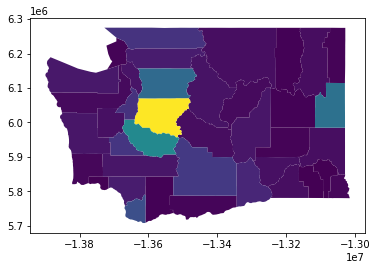

In [71]:
county_shapes.plot(column='total_hh_low_mid')

In [73]:
county_shapes['lm_rate'] = county_shapes['total_hh_low_mid']/county_shapes['n_households']

<AxesSubplot:>

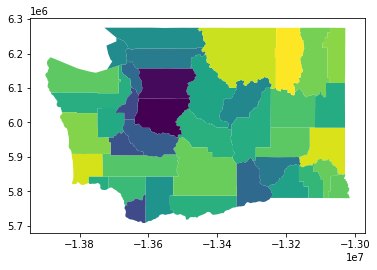

In [74]:
county_shapes.plot(column='lm_rate')

### Household Income: Low-middle income based on county median income

In [ ]:
c_median_house_income = wa_counties.loc[:, ['COUNTY','AJZAE001']]
c_median_house_income.columns = ['county', 'med_house_income']
c_median_house_income['med_house_income'] = c_median_house_income['med_house_income'].astype(int)
c_median_house_income['low_threshold'] = .8 * c_median_house_income['med_house_income']
c_median_house_income['v_low_threshold'] = .5 * c_median_house_income['med_house_income']
c_median_house_income['x_low_threshold'] = .3 * c_median_house_income['med_house_income']
c_median_house_income

In [ ]:
est_hh = c_median_house_income.copy()
est_hh = est_households(est_hh, 'low', income_cols, c_house_income)
est_hh = est_households(est_hh, 'v_low', income_cols, c_house_income)
est_hh = est_households(est_hh, 'x_low', income_cols, c_house_income)

In [ ]:
est_hh['population_low'] = round(est_hh['total_hh_low'] * c_populations['avg_household_count'], 0)
est_hh['population_v_low'] = round(est_hh['total_hh_v_low'] * c_populations['avg_household_count'], 0)
est_hh['population_x_low'] = round(est_hh['total_hh_x_low'] * c_populations['avg_household_count'], 0)

In [ ]:
est_hh

In [ ]:
print(f"""Total Washingtonians:
low income (<80% of county median): {sum(est_hh['population_low'])}
very low income (<50% of county median): {sum(est_hh['population_v_low'])}
extra low income (<30% of county median): {sum(est_hh['population_x_low'])}""")